In [1]:
from quantumdraw.wavefunction.multiqubits_wavefunction import MultiQBitWaveFunction, GaussianAnsatz
from qiskit.circuit.library import RealAmplitudes, PauliTwoDesign, ExcitationPreserving, EfficientSU2
from qiskit import Aer
import matplotlib.pyplot as plt 
import torch
import numpy as np

/home/nico/miniconda3/envs/quantumdraw/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
domain = {'xmin':-5, 'xmax':5}
def current_pot(pos):
    '''harmonic oscillator.'''
    return (pos)**2

# def current_pot(pos):
#     '''morse oscillator.'''
#     if isinstance(pos, torch.Tensor):
#         return 0.25*(torch.exp(-2.*(pos+2)) - 2.*torch.exp(-(pos+2))).view(-1, 1) 
#     else:
#         return 0.25*(np.exp(-2.*(pos+2)) - 2.*np.exp(-(pos+2))) 

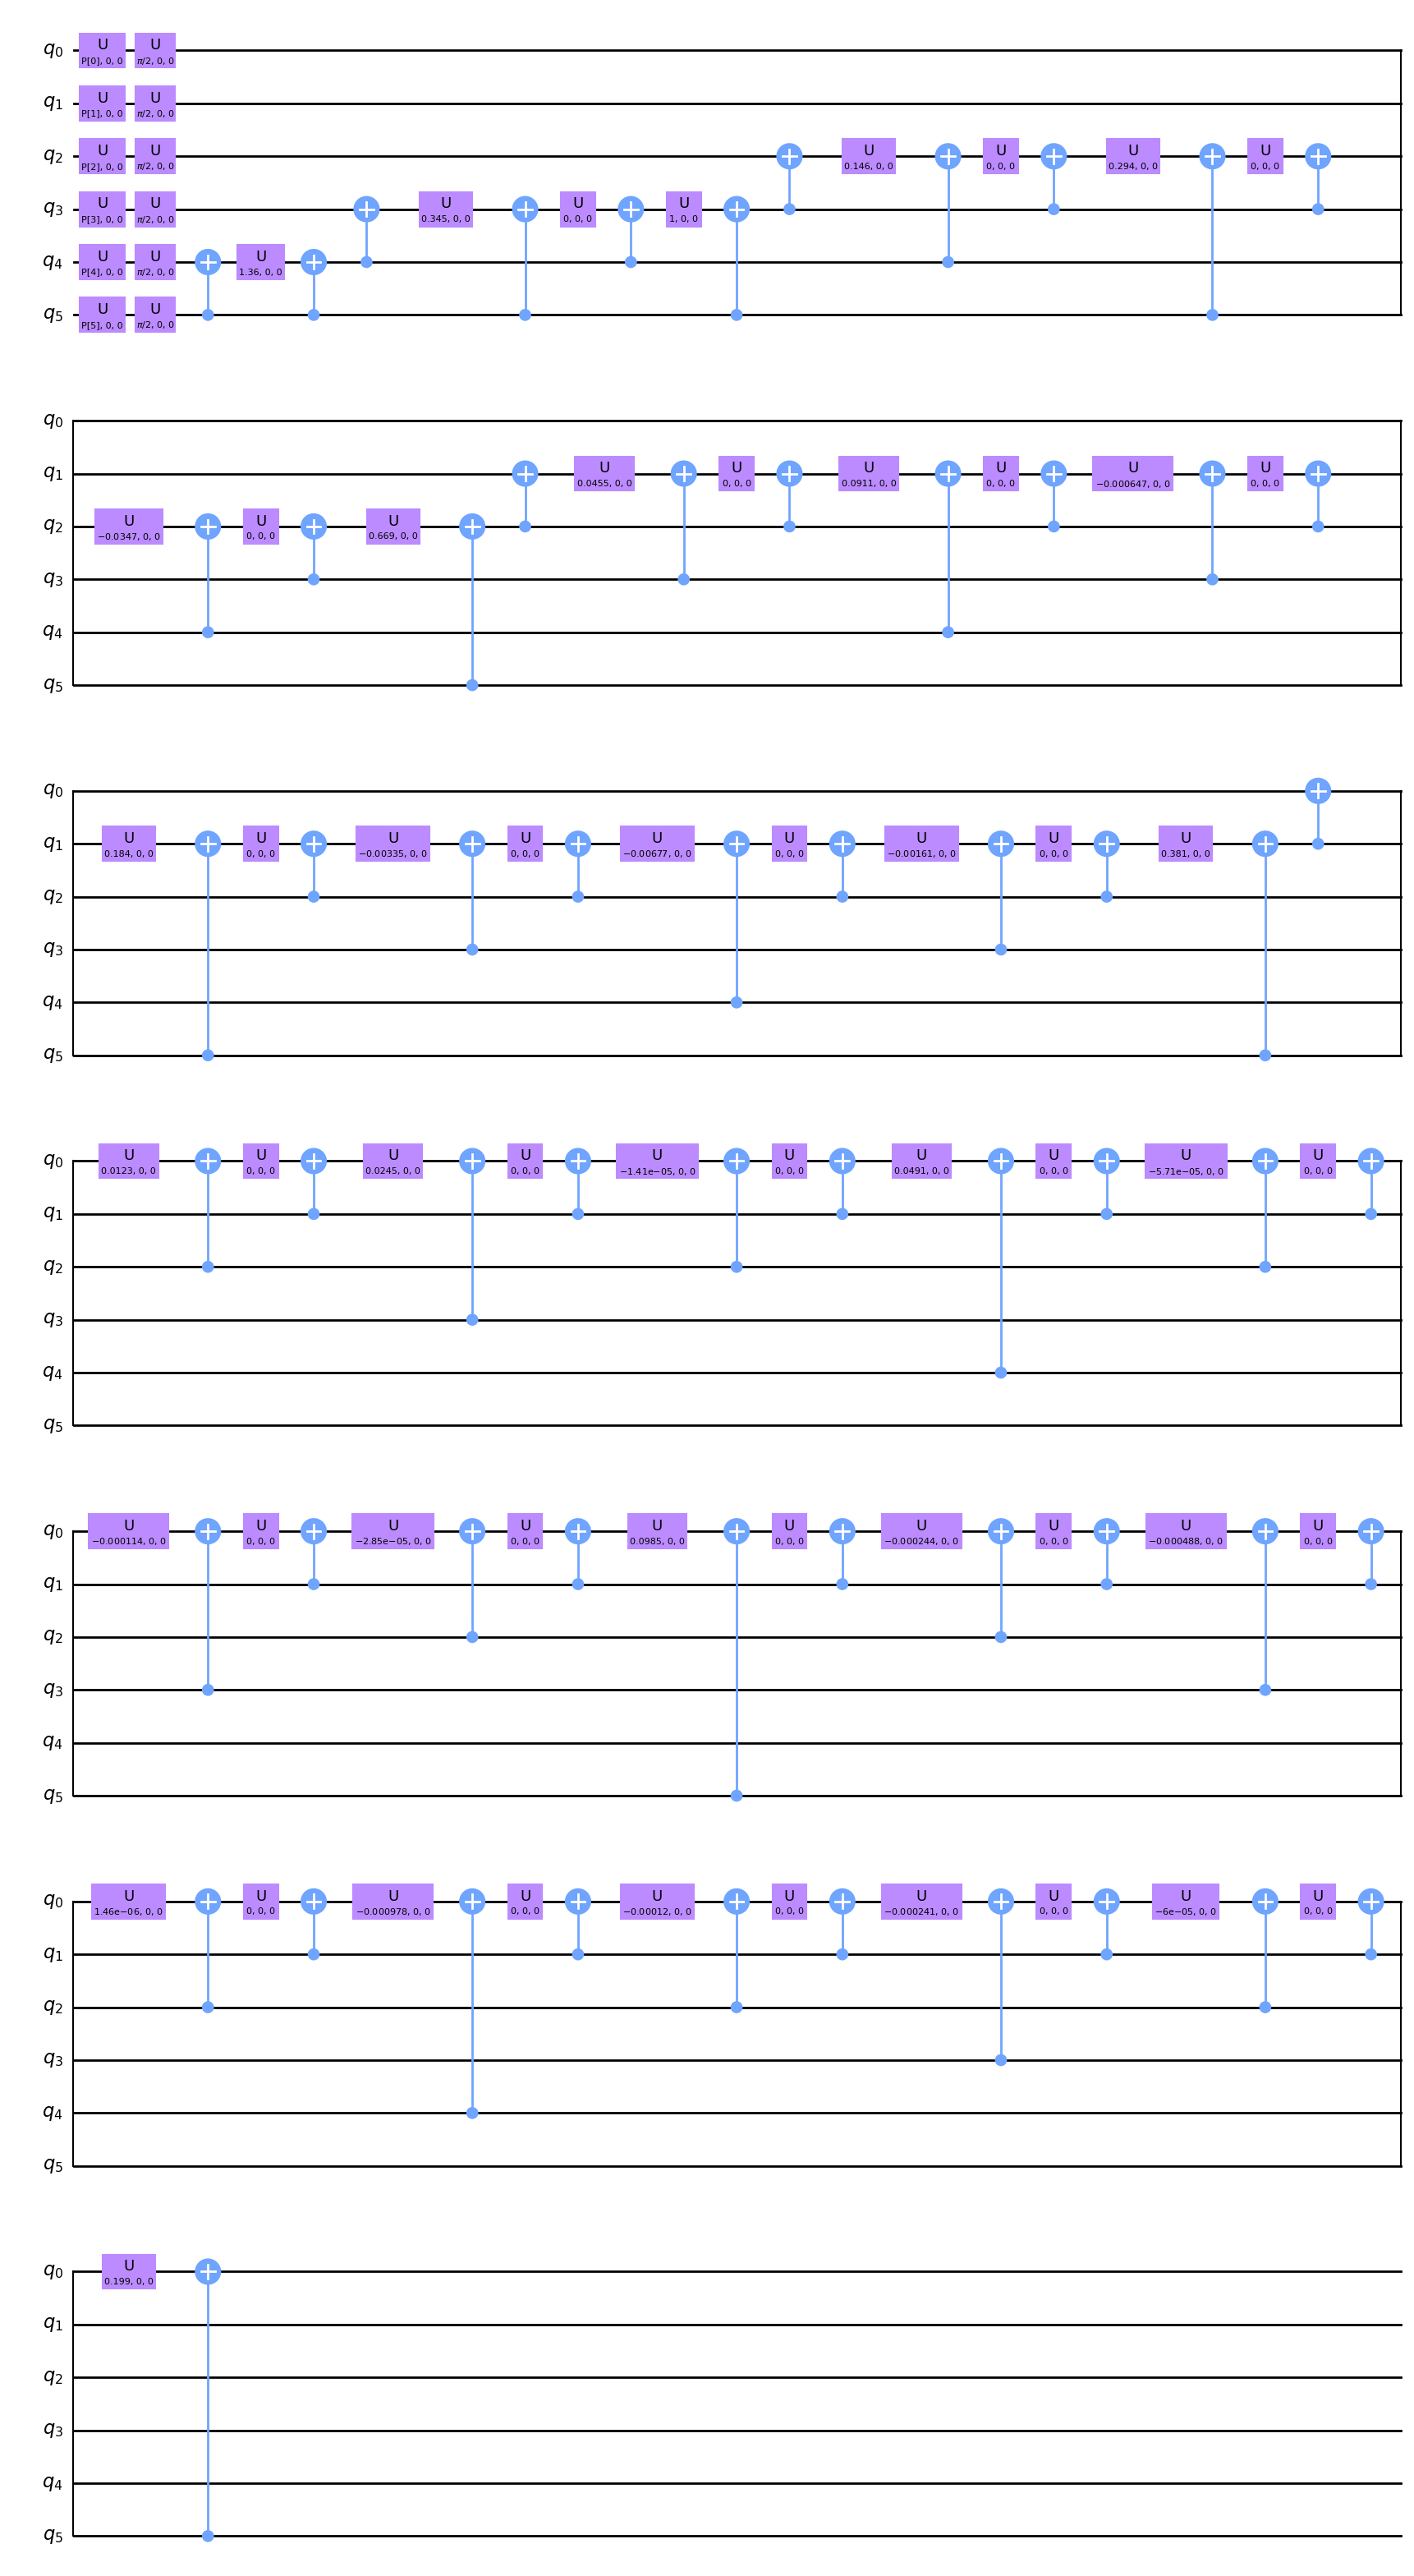

In [3]:
ipot = 0
ansatz = GaussianAnsatz(6, domain, ipot=ipot, parameters='add')
ansatz.decompose(reps=10).draw('mpl')

In [4]:
# ansatz = RealAmplitudes(5,reps=3, entanglement='linear')
# ansatz = ExcitationPreserving(5, reps=4, entanglement='full')
# ansatz = EfficientSU2(5, reps=4, entanglement='full')
# ansatz = GaussianAnsatz(6, domain, parameters=True)
wf = MultiQBitWaveFunction(current_pot, ansatz, domain, ipot=ipot, backend=Aer.get_backend('aer_simulator'), num_shots=10000)

In [5]:
import numpy as np
wf.params = np.array([1.47]+[np.pi/2]*5)
wf.params = np.array([1.68, 1.74, 1.78, 1.78,1.74,1.32])
# wf.params = np.random.rand(6)
wf.params = 0.*np.ones(6)
# k,v,e = [], [], []
# vals = np.linspace(0,np.pi,11)
# for a in vals:
#     print(a)
#     wf.params[1] = a 
#     counts = wf.sample()
#     k = wf.kinetic_energy_count(counts)
#     v = wf.nuclear_potential_count(counts)
#     e.append(k+v)
# plt.plot(vals,e)

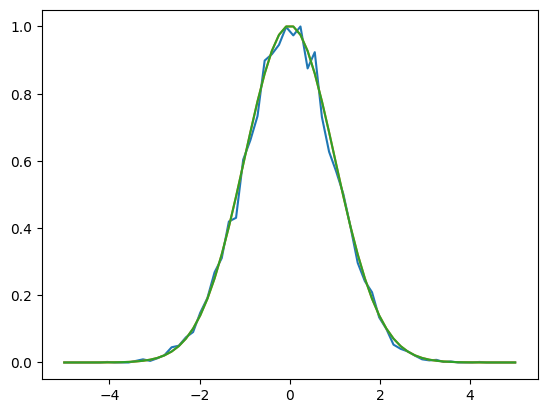

In [7]:
sol = wf.sample().numpy()
sol = np.sqrt(sol)
sol=sol/np.max(sol)
plt.plot(wf.xvect, sol)
plt.plot(wf.xvect, wf.solution['y']/wf.solution['max'])

if ipot == 0:
    x = wf.xvect
    y = np.exp(-0.5*x**2)
if ipot == 1:
    x = wf.xvect+2
    y = np.exp(-np.exp(-x)-0.5*x)
if ipot == 2:
    x = wf.xvect
    y = np.exp(-np.abs(x-2.5)) + np.exp(-np.abs(x+2.5))
y /= y.max()
plt.plot(wf.xvect, y)

In [8]:
wf.get_score()

0.7656238681465087

In [11]:
counts = wf.sample()
wf.nuclear_potential_count(counts)
# wf.kinetic_energy()

tensor(0.9988)

In [12]:
x = wf.xvect
sol = np.exp(-0.5*x**2).numpy().astype('float64')
sol

array([3.72665318e-06, 8.13815223e-06, 1.73297121e-05, 3.59843762e-05,
       7.28608284e-05, 1.43857498e-04, 2.76967767e-04, 5.19975962e-04,
       9.51907947e-04, 1.69927930e-03, 2.95795966e-03, 5.02085686e-03,
       8.31038132e-03, 1.34128826e-02, 2.11096630e-02, 3.23964842e-02,
       4.84811217e-02, 7.07465410e-02, 1.00668915e-01, 1.39683008e-01,
       1.88994616e-01, 2.49352276e-01, 3.20800424e-01, 4.02452290e-01,
       4.92324859e-01, 5.87282300e-01, 6.83124483e-01, 7.74837613e-01,
       8.56997013e-01, 9.24284756e-01, 9.72053349e-01, 9.96855557e-01,
       9.96855557e-01, 9.72053349e-01, 9.24284756e-01, 8.56997013e-01,
       7.74837613e-01, 6.83124542e-01, 5.87282300e-01, 4.92324859e-01,
       4.02452290e-01, 3.20800424e-01, 2.49352276e-01, 1.88994616e-01,
       1.39683008e-01, 1.00668915e-01, 7.07465410e-02, 4.84811217e-02,
       3.23964842e-02, 2.11096480e-02, 1.34128826e-02, 8.31038132e-03,
       5.02085686e-03, 2.95795966e-03, 1.69927848e-03, 9.51907947e-04,
      

In [35]:
from qiskit.algorithms import optimizers
wf.optimizer = optimizers.COBYLA(maxiter=250)
# wf.optimizer = optimizers.QNSPSA(100)
res = wf.run()
# wf.observables[0]

kinetic:  tensor(0.4748)  potential:  tensor(0.2462)  total:  tensor(0.7210)
kinetic:  tensor(17.7548)  potential:  tensor(0.2631)  total:  tensor(18.0179)
kinetic:  tensor(8.9449)  potential:  tensor(0.2744)  total:  tensor(9.2194)
kinetic:  tensor(4.1031)  potential:  tensor(0.3455)  total:  tensor(4.4486)
kinetic:  tensor(3.0299)  potential:  tensor(0.6785)  total:  tensor(3.7084)
kinetic:  tensor(6.0234)  potential:  tensor(1.7797)  total:  tensor(7.8030)
kinetic:  tensor(3.1931)  potential:  tensor(0.2494)  total:  tensor(3.4425)
kinetic:  tensor(12.9991)  potential:  tensor(0.4982)  total:  tensor(13.4973)
kinetic:  tensor(4.2111)  potential:  tensor(0.3150)  total:  tensor(4.5261)
kinetic:  tensor(1.3935)  potential:  tensor(0.2554)  total:  tensor(1.6489)
kinetic:  tensor(1.1461)  potential:  tensor(0.2447)  total:  tensor(1.3908)
kinetic:  tensor(1.2267)  potential:  tensor(0.2645)  total:  tensor(1.4912)
kinetic:  tensor(0.8965)  potential:  tensor(0.2595)  total:  tensor(1.1

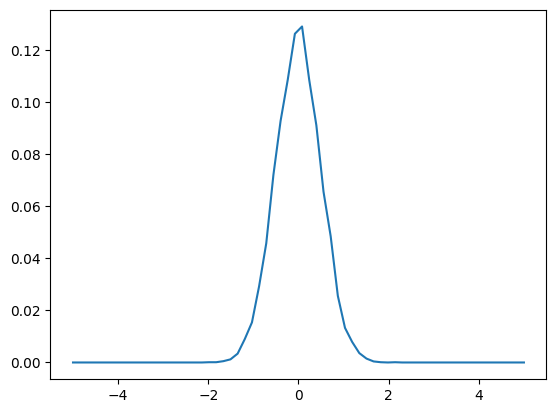

In [36]:
wf.params = res.x
plt.plot(wf.xvect, wf.sample())

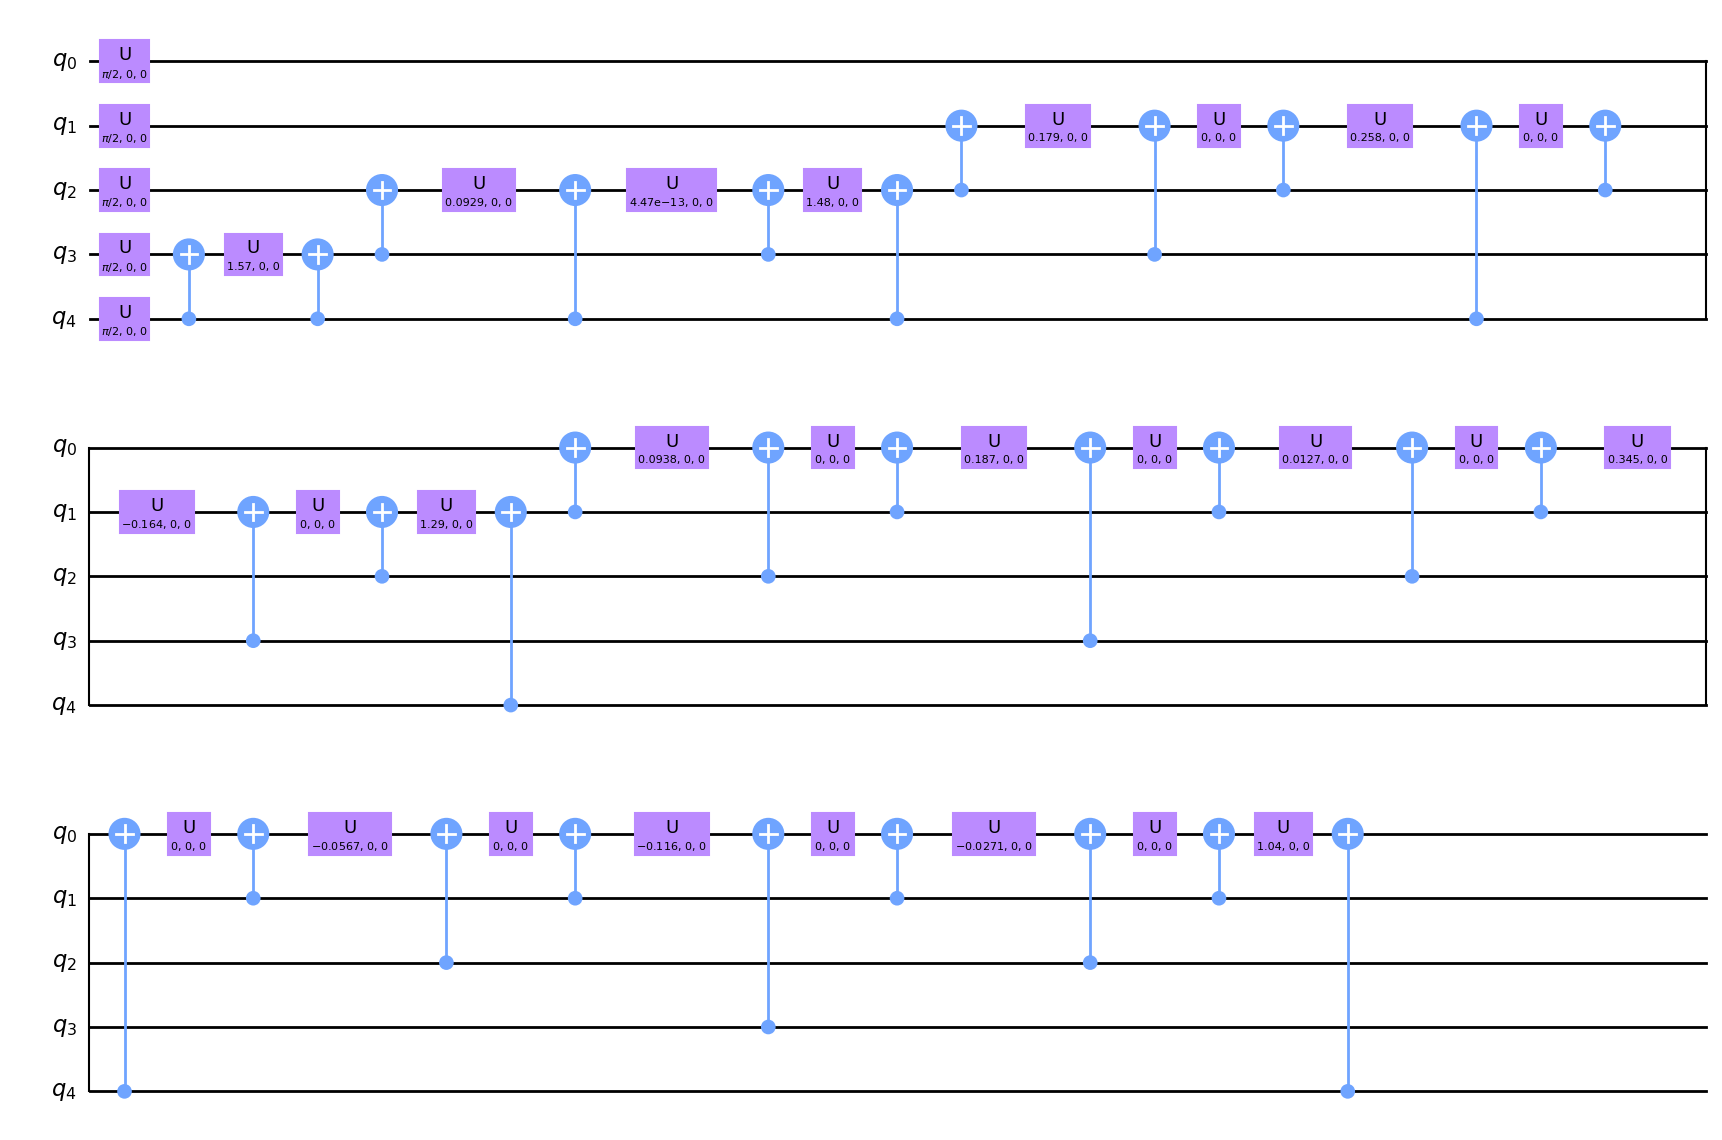

In [67]:
from qiskit import QuantumCircuit
import numpy as np
nqbits = 5
size = 2**nqbits
x = np.linspace(-5,5,size)
vect = np.exp(-(x)**2).astype('float64')
vect = vect/np.linalg.norm(vect)
np.linalg.norm(vect)
qc = QuantumCircuit(nqbits)
qc.prepare_state(vect)
qc.decompose(reps=10).draw('mpl')


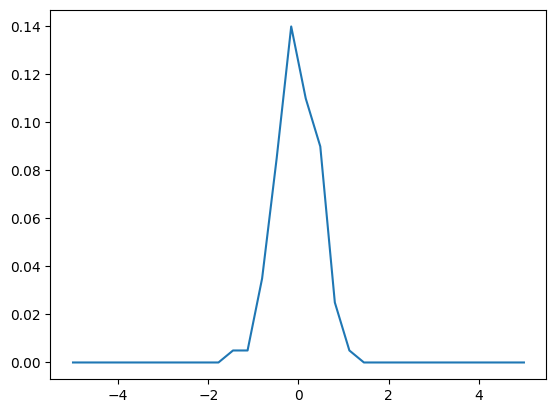

In [5]:
from qiskit import transpile, assemble
qc.measure_all()
t_qc = transpile(qc, wf.backend)
qobj = assemble(t_qc, shots=100)
counts = wf.backend.run(qobj).result().get_counts(qc)
counts = wf.sort_counts(counts)
plt.plot(wf.xvect, counts)

In [6]:
wf.kinetic_energy_count(counts)

tensor(0.2728)

In [7]:
wf.nuclear_potential_count(counts)

tensor(0.1098)

In [69]:
from qiskit.converters import circuit_to_dag, dag_to_circuit
from qiskit.tools.visualization import dag_drawer, dag_visualization 
import graphviz
dag = circuit_to_dag(qc.decompose(reps=10))
# dag_drawer(dag)

In [70]:
from qiskit.circuit.library import CXGate, UGate
dag.op_nodes(op=UGate)[:5]

[DAGOpNode(op=Instruction(name='u', num_qubits=1, num_clbits=0, params=[1.570796326794897, 0.0, 0.0]), qargs=(Qubit(QuantumRegister(5, 'q'), 0),), cargs=()),
 DAGOpNode(op=Instruction(name='u', num_qubits=1, num_clbits=0, params=[1.570796326794897, 0.0, 0.0]), qargs=(Qubit(QuantumRegister(5, 'q'), 1),), cargs=()),
 DAGOpNode(op=Instruction(name='u', num_qubits=1, num_clbits=0, params=[1.5707963267953442, 0.0, 0.0]), qargs=(Qubit(QuantumRegister(5, 'q'), 2),), cargs=()),
 DAGOpNode(op=Instruction(name='u', num_qubits=1, num_clbits=0, params=[1.570796326794725, 0.0, 0.0]), qargs=(Qubit(QuantumRegister(5, 'q'), 3),), cargs=()),
 DAGOpNode(op=Instruction(name='u', num_qubits=1, num_clbits=0, params=[1.5707963267948968, 0.0, 0.0]), qargs=(Qubit(QuantumRegister(5, 'q'), 4),), cargs=())]

In [75]:
for i in dag.topological_op_nodes():
    print(i.op)

Instruction(name='u', num_qubits=1, num_clbits=0, params=[1.570796326794897, 0.0, 0.0])
Instruction(name='u', num_qubits=1, num_clbits=0, params=[1.570796326794897, 0.0, 0.0])
Instruction(name='u', num_qubits=1, num_clbits=0, params=[1.5707963267953442, 0.0, 0.0])
Instruction(name='u', num_qubits=1, num_clbits=0, params=[1.570796326794725, 0.0, 0.0])
Instruction(name='u', num_qubits=1, num_clbits=0, params=[1.5707963267948968, 0.0, 0.0])
Instruction(name='cx', num_qubits=2, num_clbits=0, params=[])
Instruction(name='u', num_qubits=1, num_clbits=0, params=[1.570007715555709, 0.0, 0.0])
Instruction(name='cx', num_qubits=2, num_clbits=0, params=[])
Instruction(name='cx', num_qubits=2, num_clbits=0, params=[])
Instruction(name='u', num_qubits=1, num_clbits=0, params=[0.09293310193519111, 0.0, 0.0])
Instruction(name='cx', num_qubits=2, num_clbits=0, params=[])
Instruction(name='u', num_qubits=1, num_clbits=0, params=[4.46975789714088e-13, 0.0, 0.0])
Instruction(name='cx', num_qubits=2, num_

Instruction(name='u', num_qubits=1, num_clbits=0, params=[ParameterVectorElement(P[0]), 0, 0])
Instruction(name='u', num_qubits=1, num_clbits=0, params=[ParameterVectorElement(P[1]), 0, 0])
Instruction(name='u', num_qubits=1, num_clbits=0, params=[ParameterVectorElement(P[2]), 0, 0])
Instruction(name='u', num_qubits=1, num_clbits=0, params=[ParameterVectorElement(P[3]), 0, 0])


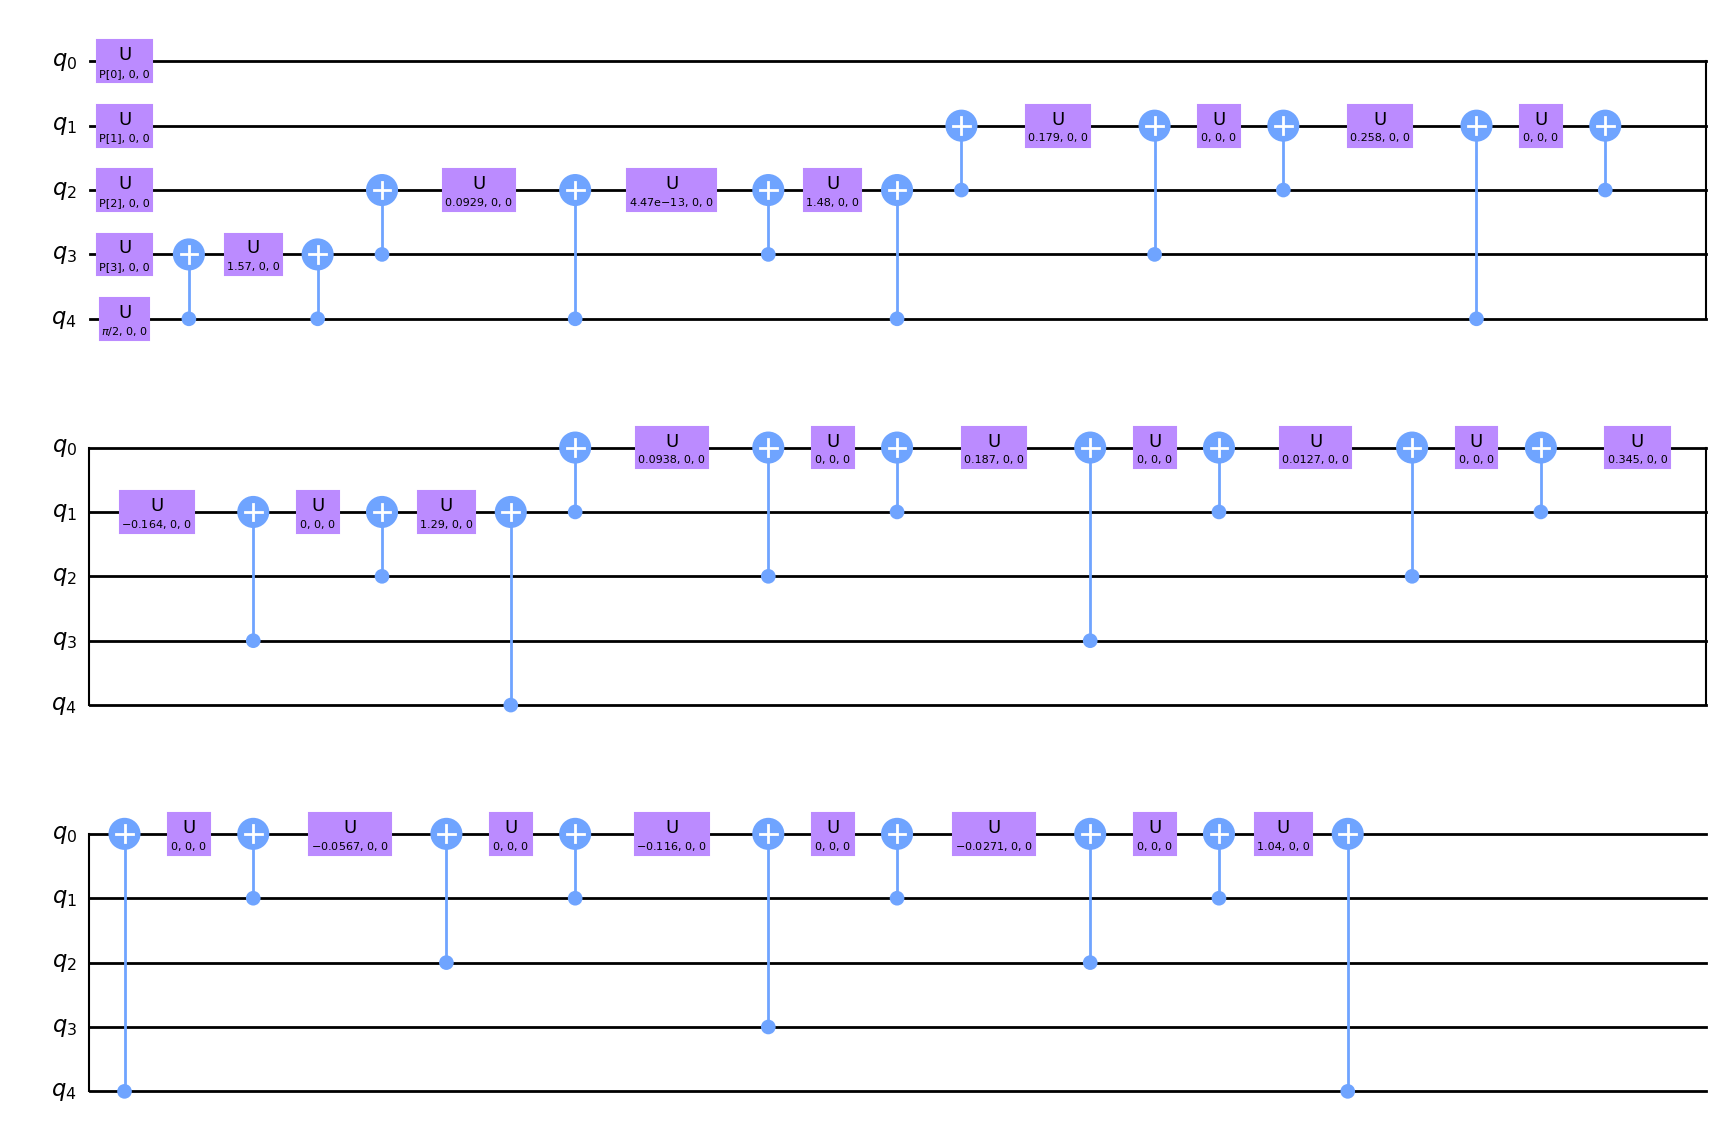

In [79]:
P = ParameterVector('P',4)
old_nodes = dag.op_nodes(op=UGate)[:5]

k = 0
for i, node in enumerate(dag.topological_op_nodes()):

    if isinstance(node.op, UGate):
        # mini_dag = DAGCircuit()
        # p = QuantumRegister(1)
        # mini_dag.add_qreg(p)
        # mini_dag.apply_operation_back(UGate(P[i],0,0))
        print(node.op)
        _qc = QuantumCircuit(1)
        _qc.u(P[k],0,0,0)
        mini_dag = circuit_to_dag(_qc)
        dag.substitute_node_with_dag(node, mini_dag)
        k += 1
    if k == 4:
        break
    # dag.substitute_node(old,UGate(p,0,0))
# dag_drawer(dag)
newqc = dag_to_circuit(dag)
newqc.draw('mpl')
    #  

In [80]:
newqc.parameters

ParameterView([ParameterVectorElement(P[0]), ParameterVectorElement(P[1]), ParameterVectorElement(P[2]), ParameterVectorElement(P[3])])

In [1]:
from quantumdraw.server.scores import get_quantum_ai_score
iterator = get_quantum_ai_score(current_pot)
for step in iterator:
    print(step)

/home/nico/miniconda3/envs/quantumdraw/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ImportError: cannot import name 'get_quantum_ai_score' from 'quantumdraw.server.scores' (/home/nico/QuantumApplicationLab/QuantumDraw/quantumdraw/server/scores.py)

In [ ]:
from quantumdraw.server.scores import get_ai_score, get_quantum_ai_score 
iterator = get_ai_score(current_pot)
for step in iterator:
    print(step)

100%|██████████| 2000/2000 [00:01<00:00, 1493.70it/s]


Acceptance rate 87.458 %
score : 0.249647
score : 0.267937
([(-5.0, 0.008066501468420029), (-4.8, 0.021909505128860474), (-4.6, 0.04929041117429733), (-4.4, 0.09252791851758957), (-4.2, 0.14695367217063904), (-4.0, 0.20244407653808594), (-3.8, 0.25172939896583557), (-3.6, 0.2968320846557617), (-3.4, 0.34428250789642334), (-3.2, 0.39337387681007385), (-3.0, 0.43177199363708496), (-2.8, 0.44412991404533386), (-2.6, 0.4239364266395569), (-2.4, 0.37689530849456787), (-2.2, 0.3153817653656006), (-2.0, 0.251820832490921), (-1.7999999999999998, 0.1958891600370407), (-1.6, 0.1536281704902649), (-1.4, 0.12587852776050568), (-1.2000000000000002, 0.1080411747097969), (-1.0, 0.09413594752550125), (-0.7999999999999998, 0.0827464833855629), (-0.5999999999999996, 0.07886567711830139), (-0.40000000000000036, 0.09027296304702759), (-0.20000000000000018, 0.12381643801927567), (0.0, 0.1860397309064865), (0.20000000000000018, 0.2848720848560333), (0.40000000000000036, 0.42526063323020935), (0.599999999999

KeyboardInterrupt: 

In [9]:
counts = wf.sample().detach().numpy().tolist()

In [12]:
points = list(zip(wf.xvect.numpy().tolist(), counts))

In [13]:
points

[(-5.0, 0.004900000058114529),
 (-4.677419185638428, 0.002300000051036477),
 (-4.354838848114014, 0.14380000531673431),
 (-4.032258033752441, 0.0406000018119812),
 (-3.7096774578094482, 0.011300000362098217),
 (-3.387096881866455, 0.0006000000284984708),
 (-3.064516067504883, 0.009800000116229057),
 (-2.7419354915618896, 0.02329999953508377),
 (-2.4193549156188965, 0.025200000032782555),
 (-2.0967743396759033, 0.006899999920278788),
 (-1.7741936445236206, 0.029200000688433647),
 (-1.451612949371338, 0.012199999764561653),
 (-1.1290323734283447, 0.00430000014603138),
 (-0.8064517974853516, 0.000699999975040555),
 (-0.48387110233306885, 0.05860000103712082),
 (-0.16129040718078613, 0.028699999675154686),
 (0.16129064559936523, 0.0052999998442828655),
 (0.4838712811470032, 0.003599999938160181),
 (0.8064519166946411, 0.014000000432133675),
 (1.1290326118469238, 0.024000000208616257),
 (1.451613187789917, 0.009700000286102295),
 (1.7741937637329102, 0.0005000000237487257),
 (2.096774578094

In [16]:
from qiskit.quantum_info import Operator
from qiskit.algorithms.linear_solvers import TridiagonalToeplitz
import numpy as np 

In [19]:
TridiagonalToeplitz(2,-2,1).to_instruction()

/tmp/ipykernel_3055/2413109224.py:1: DeprecationWarning: The TridiagonalToeplitz class is deprecated as of Qiskit Terra 0.22.0 and will be removed no sooner than 3 months after the release date. 
  TridiagonalToeplitz(2,-2,1).to_instruction()


Instruction(name='tridi', num_qubits=3, num_clbits=0, params=[])

In [25]:
tr = -1*np.eye(4)
# tr += np.eye(4,k=1) + np.eye(4,k=-1)
op = Operator(tr)

In [30]:
from qiskit.opflow import StateFn, TensoredOp, CircuitStateFn, X, OperatorStateFn
~OperatorStateFn(op)

OperatorStateFn(Operator([[-1.-0.j, -0.-0.j, -0.-0.j, -0.-0.j],
          [-0.-0.j, -1.-0.j, -0.-0.j, -0.-0.j],
          [-0.-0.j, -0.-0.j, -1.-0.j, -0.-0.j],
          [-0.-0.j, -0.-0.j, -0.-0.j, -1.-0.j]],
         input_dims=(2, 2), output_dims=(2, 2)), coeff=1.0, is_measurement=True)